In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/cameronpaschall/Desktop/Instacart Basket Analysis'

In [3]:
# Import data set
opm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_flags.pkl'))

## Bar Chart

<AxesSubplot:>

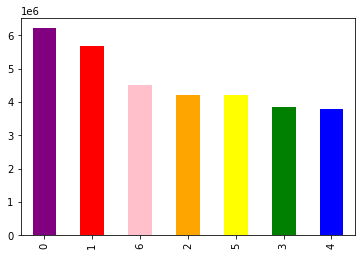

In [4]:
opm['orders_day_of_week'].value_counts().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

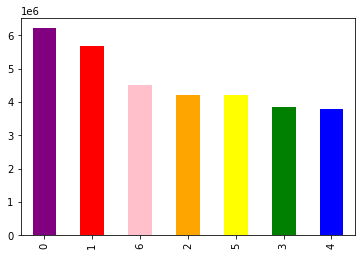

In [5]:
bar = opm['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Histogram

<AxesSubplot:ylabel='Frequency'>

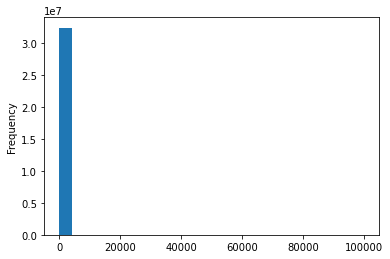

In [7]:
opm['prices'].plot.hist(bins = 25)

In [8]:
opm['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

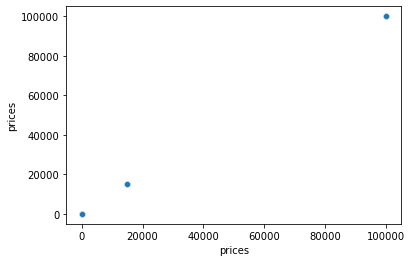

In [9]:
sns.scatterplot(x = 'prices', y = 'prices',data = opm)

In [10]:
opm.loc[opm['prices'] > 100]

order_id  user_id  order_number  orders_day_of_week  \
1576        912404       17            12                   2   
1638        603376       17            22                   6   
16534      3264360      135             2                   2   
16540       892534      135             3                   0   
53712       229704      342             8                   1   
...            ...      ...           ...                 ...   
32350634   3172853   205650            18                   1   
32377867   2504315   205818             3                   5   
32377877   1108388   205818             5                   4   
32410707   1916142   206049             1                   2   
32410731    379732   206049             4                   1   

          order_time_of_day  days_since_prior_order  product_id  \
1576                     14                    5.00       21553   
1638                     16                    4.00       21553   
16534                    21                   13.00       21553   
16540                     8                   12.00       21553   
53712                    19                   30.00       21553   
...                     ...                     ...         ...   
32350634                  9                    7.00       21553   
32377867                 15                    3.00       21553   
32377877                  5                    1.00       21553   
32410707                 17                    1.11       21553   
32410731                 14                    5.00       21553   

          add_to_cart_order  reordered                      product_name  ...  \
1576                      5          0  Lowfat 2% Milkfat Cottage Cheese  ...   
1638                      3          1  Lowfat 2% Milkfat Cottage Cheese  ...   
16534                     6          0  Lowfat 2% Milkfat Cottage Cheese  ...   
16540                     3          1  Lowfat 2% Milkfat Cottage Cheese  ...   
53712                     9          0  Lowfat 2% Milkfat Cottage Cheese  ...   
...                     ...        ...                               ...  ...   
32350634                 17          1  Lowfat 2% Milkfat Cottage Cheese  ...   
32377867                 13          0  Lowfat 2% Milkfat Cottage Cheese  ...   
32377877                  5          1  Lowfat 2% Milkfat Cottage Cheese  ...   
32410707                  2          0  Lowfat 2% Milkfat Cottage Cheese  ...   
32410731                  4          1  Lowfat 2% Milkfat Cottage Cheese  ...   

             price_range_loc    Busiest days    Slowest days  \
1576      High-range product  Regularly busy  Regularly busy   
1638      High-range product  Regularly busy  Regularly busy   
16534     High-range product  Regularly busy  Regularly busy   
16540     High-range product    Busiest days    Busiest days   
53712     High-range product    Busiest days    Busiest days   
...                      ...             ...             ...   
32350634  High-range product    Busiest days    Busiest days   
32377867  High-range product  Regularly busy  Regularly busy   
32377877  High-range product    Slowest days    Slowest days   
32410707  High-range product  Regularly busy  Regularly busy   
32410731  High-range product    Busiest days    Busiest days   

         busiest_period_of_day max_order      loyalty_flag     spending  \
1576            Average orders        40  Regular customer   108.648299   
1638            Average orders        40  Regular customer   108.648299   
16534           Average orders         4      New customer  1154.792308   
16540           Average orders         4      New customer  1154.792308   
53712           Average orders        16  Regular customer   114.426619   
...                        ...       ...               ...          ...   
32350634        Average orders        25  Regular customer   351.141618   
32377867        Average orders        25  Regular customer   170.073770   
3237787

In [11]:
opm.loc[opm['prices'] >100, 'prices'] = np.nan

In [12]:
opm['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

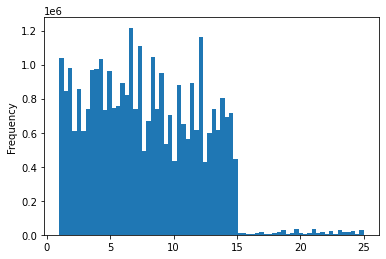

In [13]:
opm['prices'].plot.hist(bins = 70)

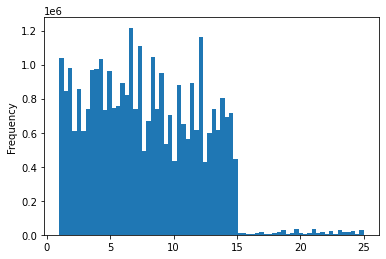

In [14]:
hist = opm['prices'].plot.hist(bins = 70)

In [15]:
## Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## Line chart

In [16]:
df = opm[:2000000]

In [17]:
np.random.seed(4)

In [18]:
dev = np.random.rand(len(opm)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
np.random.rand(10)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069])

In [21]:
big = opm[dev]

In [22]:
small = opm[~dev]

In [23]:
## size check
len(opm)

32435059

In [24]:
## size check
len(big) + len(small)

32435059

In [25]:
df_2 = small[['orders_day_of_week','prices']]

In [26]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [27]:
## Export line graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_days.png'))